In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import qutip as qtp
from pulse_sim import *

## Parameters from `ibmq_lima`

In [2]:
params_orig = {'delta0': -2109526390.232452,
 'delta1': -2000246532.4219205,
 'delta2': -2096093619.9138844,
 'delta3': -2081254439.3432896,
 'delta4': -2101534832.5639515,
 'jq0q1': 11088625.669671271,
 'jq1q2': 11792549.39343634,
 'jq1q3': 11913891.984976945,
 'jq3q4': 11656329.753118027,
 'omegad0': 1588538050.4400413,
 'omegad1': 1305787281.3336856,
 'omegad2': 1402177549.1160629,
 'omegad3': 1553798885.4251251,
 'omegad4': 1555145151.5021167,
 'wq0': 31602900677.68124,
 'wq1': 32218187482.363426,
 'wq2': 32970108859.848026,
 'wq3': 33314625039.25904,
 'wq4': 31994952868.608166}

## Test: Hamiltonian definition

In [3]:
h_int, h_drive = make_hamiltonian_components(0, params_orig)
print('h_int', h_int)
print('h_drive', str(h_drive))

h_int []
h_drive [(DriveExprGen: num_channels = 1, base_frequency = 31602900677.68124,
base_amplitude = [7.94269025e+08],
base_phase = [0.], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]])]


In [4]:
params = dict(params_orig)
params['crosstalk'] = np.array([[1., 0.8], [0.6j, 1.]], dtype=np.complex128)
h_int, h_drive = make_hamiltonian_components((0, 1), params, num_levels=3)

print('Hint')
for freq, cos, sin in h_int:
    print('Frequency = ', freq)
    cos_data = cos.full()
    cos_indices = cos_data.nonzero()
    print('Hcos = ', ' + '.join(f'{cos_data[i, j]}[{i},{j}]' for i, j in zip(*cos_indices)))
    sin_data = sin.full()
    sin_indices = sin_data.nonzero()
    print('Hsin = ', ' + '.join(f'{sin_data[i, j]}[{i},{j}]' for i, j in zip(*sin_indices)))

Hint
Frequency =  -615286804.6821861
Hcos =  (11088625.669671271+0j)[1,3] + (11088625.669671271+0j)[3,1]
Hsin =  -11088625.669671271j[1,3] + 11088625.669671271j[3,1]
Frequency =  1384959727.7397344
Hcos =  (15681684.810127556+0j)[2,4] + (15681684.810127556+0j)[4,2]
Hsin =  -15681684.810127556j[2,4] + 15681684.810127556j[4,2]
Frequency =  -2724813194.914638
Hcos =  (15681684.810127556+0j)[4,6] + (15681684.810127556+0j)[6,4]
Hsin =  -15681684.810127556j[4,6] + 15681684.810127556j[6,4]
Frequency =  -724566662.4927175
Hcos =  (22177251.339342546+0j)[5,7] + (22177251.339342546+0j)[7,5]
Hsin =  -22177251.339342546j[5,7] + 22177251.339342546j[7,5]


In [5]:
h_drive

[(DriveExprGen: num_channels = 2, base_frequency = 31602900677.68124,
  base_amplitude = [7.94269025e+08 3.91736184e+08],
  base_phase = [0.         1.57079633],
  Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 1. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0.]],
  Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
  Qobj data =
  [[0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
   [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
   [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j]
   [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
   [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
   [0.+0

## Check: Single qubit resonant pulse simulation

In [6]:
drive_def = {0: {'frequency': params['wq0']}}
e_ops = [qtp.sigmaz()]
result = run_pulse_sim(0, params_orig, drive_def, e_ops=e_ops)

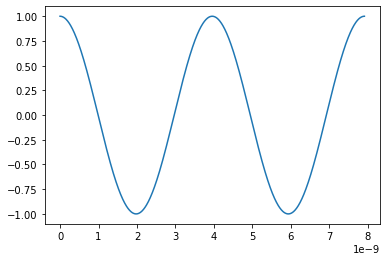

In [7]:
plt.plot(result.times, result.expect[0])

## Check: Single qubit off-resonant pulse simulation

In [8]:
h_int, h_drive = make_hamiltonian_components(0, params_orig)
h_int, h_drive

([],
 [(DriveExprGen: num_channels = 1, base_frequency = 31602900677.68124,
   base_amplitude = [7.94269025e+08],
   base_phase = [0.],
   Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
   Qobj data =
   [[0. 1.]
    [1. 0.]],
   Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
   Qobj data =
   [[0.+0.j 0.-1.j]
    [0.+1.j 0.+0.j]])])

In [9]:
drive_def = {0: {'frequency': params['wq1']}}
hamiltonian = build_pulse_hamiltonian(h_int, h_drive, drive_def)
hamiltonian

[(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
  Qobj data =
  [[0. 1.]
   [1. 0.]],
  '794269025.2200207 * cos(-615286804.6821861 * t)'),
 (Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
  Qobj data =
  [[0.+0.j 0.-1.j]
   [0.+1.j 0.+0.j]],
  '794269025.2200207 * sin(-615286804.6821861 * t)')]

In [10]:
tlist = make_tlist(h_int, h_drive, drive_def, 100, 2)
tlist[0], tlist[-1]

(0.0, 2.0423598423909115e-08)

In [11]:
psi0 = (qtp.basis(2, 0) + qtp.basis(2, 1)) / np.sqrt(2.)
e_ops = [qtp.sigmax()]
result = qtp.sesolve(hamiltonian, psi0, tlist, e_ops=e_ops)

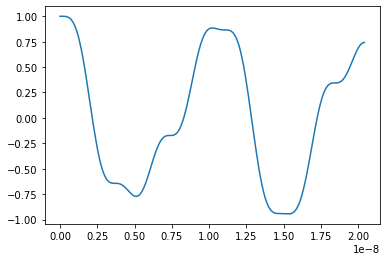

In [12]:
plt.plot(result.times, result.expect[0])

## Check: Two qubit cross resonance, no crosstalk

In [13]:
params = dict(params_orig)

#params['crosstalk'] = np.array([[1., 0.8 * np.exp(-np.pi / 4. * 1.j)], [0., 1.]], dtype=np.complex128)
h_int, h_drive = make_hamiltonian_components((0, 1), params)
drive_def = {0: {'frequency': params['wq1'], 'amplitude': 0.06}}
hamiltonian = build_pulse_hamiltonian(h_int, h_drive, drive_def)
hamiltonian

[(Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[       0.                0.                0.                0.        ]
   [       0.                0.         11088625.66967127        0.        ]
   [       0.         11088625.66967127        0.                0.        ]
   [       0.                0.                0.                0.        ]],
  'cos(-615286804.6821861 * t)'),
 (Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[0.       +0.j         0.       +0.j         0.       +0.j
    0.       +0.j        ]
   [0.       +0.j         0.       +0.j         0.-11088625.66967127j
    0.       +0.j        ]
   [0.       +0.j         0.+11088625.66967127j 0.       +0.j
    0.       +0.j        ]
   [0.       +0.j         0.       +0.j         0.       +0.j
    0.       +0.j        ]],
  'sin(-615286804.6821861 * t)'),
 (Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4

In [14]:
psi0_0 = qtp.tensor(qtp.basis(2, 0), qtp.basis(2, 0))
psi0_1 = qtp.tensor(qtp.basis(2, 1), qtp.basis(2, 0))
tlist = np.linspace(0., 2. * np.pi / params['wq1'] * 1000, 10000)
e_ops = [qtp.tensor(qtp.qeye(2), qtp.sigmay()), qtp.tensor(qtp.qeye(2), qtp.sigmaz())]
result_0 = qtp.sesolve(hamiltonian, psi0_0, tlist, e_ops=e_ops)
result_1 = qtp.sesolve(hamiltonian, psi0_1, tlist, e_ops=e_ops)

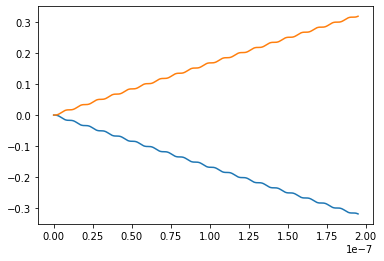

In [15]:
plt.plot(tlist, result_0.expect[0])
plt.plot(tlist, result_1.expect[0])

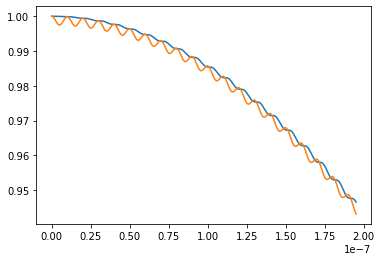

In [16]:
plt.plot(tlist, result_0.expect[1])
plt.plot(tlist, result_1.expect[1])

## Check: Gell-Mann matrices

In [17]:
gmmat = make_generalized_paulis(3, 4)
gmmat

array([[[ 0.57735027+0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.57735027+0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.57735027+0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ]],

       [[ 0.        +0.j        ,  0.70710678+0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.70710678+0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ]],

       [[ 0.        +0.j        , -0.       

In [18]:
inner_prod = np.einsum('lij,kji->lk', gmmat, gmmat)
inner_prod

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
        0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        1.+0.j]])

In [19]:
np.any(np.abs(inner_prod - np.eye(9, dtype=np.complex128)) > 1.e-10)

False

## Check: two-qutrit bases

In [20]:
basis = make_prod_basis(gmmat, 2)
basis.shape

(9, 9, 16, 16)

In [21]:
inner_prod = np.einsum('lij,kji->lk', basis.reshape(-1, 16, 16), basis.reshape(-1, 16, 16))
inner_prod

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [22]:
np.any(np.abs(inner_prod - np.eye(inner_prod.shape[0], dtype=np.complex128)) > 1.e-10)

False

## Check: Heff for qubit 0 off-resonant drive

In [23]:
drive_def = {0: {'frequency': params['wq1'], 'amplitude': 0.06}}
coeffs = find_heff(0, params_orig, drive_def, num_sim_levels=2, comp_dim=2, save_result_to='test')
coeffs

/home/iiyama/src/qudit-sim/pulse_sim.py:639: RuntimeWarning: divide by zero encountered in double_scalars
  residual = abs(np.sum(ydata - popt[0] * xdata) / np.sum(ydata))
Linear fit for 0th pauli coefficient did not yield a reliable result (minimum residual = 0.006373856817126988). Run the function with the save_result_to option and check the raw output.
Linear fit for 2th pauli coefficient did not yield a reliable result (minimum residual = 0.0042157379904606005). Run the function with the save_result_to option and check the raw output.


array([      0.        ,  403785.92182338,       0.        ,
       5148778.4101701 ])

In [24]:
with h5py.File('test.h5', 'r') as source:
    coeffs_t = source['pauli_coeffs'][:]
    tlist = source['tlist'][:]

coeffs_t.shape

(4000, 4)

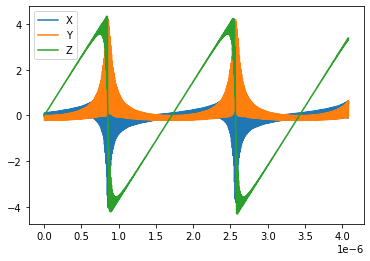

In [25]:
plt.plot(tlist, coeffs_t[:, 1], label='X')
plt.plot(tlist, coeffs_t[:, 2], label='Y')
plt.plot(tlist, coeffs_t[:, 3], label='Z')
plt.legend()

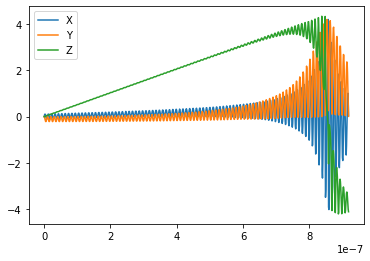

In [26]:
tlist_tr = tlist[:900]
coeffs_t_tr = coeffs_t[:900]
plt.plot(tlist_tr, coeffs_t_tr[:, 1], label='X')
plt.plot(tlist_tr, coeffs_t_tr[:, 2], label='Y')
plt.plot(tlist_tr, coeffs_t_tr[:, 3], label='Z')
plt.legend()

### Numerical instability close to where eigenvalues jump?

Check the eigenvalues directly

In [27]:
result = run_pulse_sim(0, params_orig, drive_def, psi0=qtp.qeye(2), tlist=(10, 400))
unitaries = np.concatenate(list(np.expand_dims(state.full(), axis=0) for state in result.states))
eigvals, eigcols = np.linalg.eig(unitaries)
eigrows = np.conjugate(np.transpose(eigcols, axes=(0, 2, 1)))

omega_t = -np.angle(eigvals)

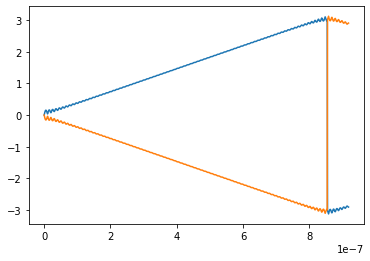

In [28]:
plt.plot(tlist[:900], omega_t[:900])

There seems to be some broadening of the oscillations around 0 and 2pi, but not as dramatic as above.

What happens with a phase shift?

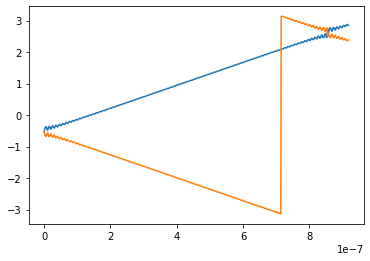

In [29]:
omega_t_eig_shift = -np.angle(eigvals * np.exp(1.j * np.pi / 6.))
plt.plot(tlist[:900], omega_t_eig_shift[:900])

So it's not a feature of the `angle` function. What if the simulation is started from the middle?

In [30]:
psi0 = qtp.Qobj(inpt=(eigcols[100] @ np.diag(eigvals[100]) @ eigrows[100]))

result = run_pulse_sim(0, params_orig, drive_def, psi0=psi0, tlist=(10, 400))
unitaries_restart = np.concatenate(list(np.expand_dims(state.full(), axis=0) for state in result.states))
eigvals_restart, eigcols_restart = np.linalg.eig(unitaries_restart)
eigrows_restart = np.conjugate(np.transpose(eigcols_restart, axes=(0, 2, 1)))

omega_t_restart = -np.angle(eigvals_restart)

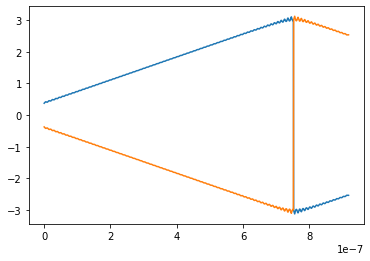

In [31]:
plt.plot(tlist[:900], omega_t_restart[:900])

And what if the initial state is Rz * I?

In [32]:
psi0 = qtp.Qobj(inpt=[[np.exp(1.j * np.pi / 6.), 0.], [0., np.exp(-1.j * np.pi / 6.)]])

result = run_pulse_sim(0, params_orig, drive_def, psi0=psi0, tlist=(10, 400))
unitaries_shift = np.concatenate(list(np.expand_dims(state.full(), axis=0) for state in result.states))
eigvals_shift, eigcols_shift = np.linalg.eig(unitaries_shift)
eigrows_shift = np.conjugate(np.transpose(eigcols_shift, axes=(0, 2, 1)))

omega_t_shift = -np.angle(eigvals_shift)

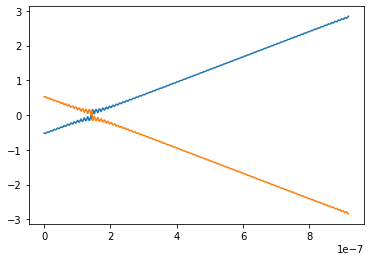

In [33]:
plt.plot(tlist[:900], omega_t_shift[:900])

I guess there is some resonance effect when the evolution operator approaches degeneracy.. It's a feature then.

Which range are the fits done? How do the fits look?

In [34]:
# Find the first t where an eigenvalue does a 2pi jump
omega_min = np.amin(omega_t, axis=1)
omega_max = np.amax(omega_t, axis=1)

omega_min, omega_max

(array([-0.        , -0.04788038, -0.0910684 , ..., -2.40389356,
        -2.41303802, -2.42151097]),
 array([-0.        ,  0.04788038,  0.0910684 , ...,  2.40389356,
         2.41303802,  2.42151097]))

(-3.141592653589793, -3.121592653589793)

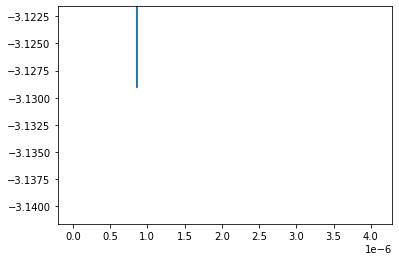

In [35]:
plt.plot(tlist, omega_min)
plt.ylim(-np.pi, -np.pi + 0.02)

Original margin of 0.01 was too small.

In [36]:
margin = 0.1

min_hits_minus_pi = np.asarray(omega_min < -np.pi + margin).nonzero()[0]
if len(min_hits_minus_pi) == 0:
    tmax_min = omega_t.shape[0]
else:
    tmax_min = min_hits_minus_pi[0]

tmax_min

819

In [37]:
max_hits_pi = np.asarray(omega_max > np.pi - margin).nonzero()[0]
if len(max_hits_pi) == 0:
    tmax_max = omega_t.shape[0]
else:
    tmax_max = max_hits_pi[0]
    
tmax = min(tmax_min, tmax_max)
tmax

819

In [38]:
heff_t = (eigcols[:tmax] * np.tile(np.expand_dims(omega_t[:tmax], axis=1), (1, omega_t.shape[1], 1))) @ eigrows[:tmax]
    
## Extract the (generalized) Pauli components
    
paulis = make_generalized_paulis(2, matrix_dim=2)
prod_basis = make_prod_basis(paulis, 1)

# Compute the inner product (trace of matrix product) with the prod_basis at each time point
# Implicitly using the 17-qubit limit in assuming that the indices of the basis won't reach x
qubit_indices = string.ascii_letters[:1]
pauli_coeffs_t = np.einsum(f'txy,{qubit_indices}yx->t{qubit_indices}', heff_t[:tmax], prod_basis).real

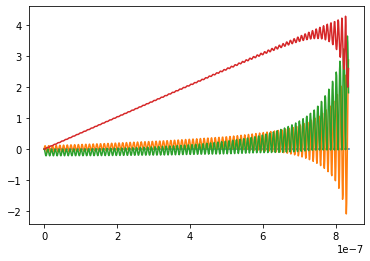

In [39]:
plt.plot(tlist[:tmax], pauli_coeffs_t)

In [40]:
line = lambda a, x: a * x

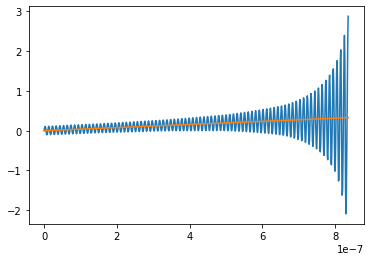

In [41]:
popt, _ = sciopt.curve_fit(line, tlist[:tmax], pauli_coeffs_t[:, 1])
plt.plot(tlist[:tmax], pauli_coeffs_t[:, 1])
plt.plot(tlist[[0, tmax]], popt[0] * tlist[[0, tmax]])

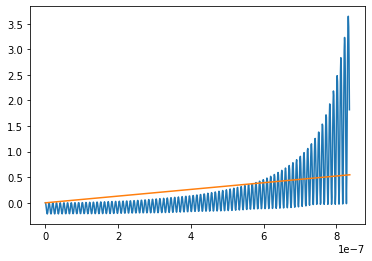

In [42]:
popt, _ = sciopt.curve_fit(line, tlist[:tmax], pauli_coeffs_t[:, 2])
plt.plot(tlist[:tmax], pauli_coeffs_t[:, 2])
plt.plot(tlist[[0, tmax]], popt[0] * tlist[[0, tmax]])

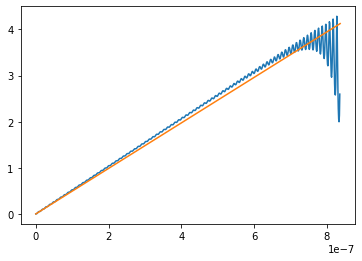

In [43]:
popt, _ = sciopt.curve_fit(line, tlist[:tmax], pauli_coeffs_t[:, 3])
plt.plot(tlist[:tmax], pauli_coeffs_t[:, 3])
plt.plot(tlist[[0, tmax]], popt[0] * tlist[[0, tmax]])

Fitting from 0.0 to 8.355340590526459e-07
Relative integral 0.00479287578127914
Fitting from 8.273625768125223e-08 to 7.517763660913783e-07
Relative integral 0.007980455971478818
Fitting from 1.491295508822571e-07 to 6.843616376103579e-07
Relative integral -0.003509763734087984
Fitting from 2.02244185443061e-07 to 6.302255677695386e-07
Relative integral 0.003689951989347608
Fitting from 2.451444672037103e-07 to 5.873252860088893e-07
Relative integral 0.003955603725448425
Fitting from 2.7885183144422046e-07 to 5.525964864883636e-07
Relative integral -0.0037302005100376037
Fitting from 3.054091487246224e-07 to 5.250177339279462e-07
Relative integral 0.0021351331488818734
Fitting from 3.268592896049471e-07 to 5.025461577676061e-07
Relative integral -0.0009557941173659217


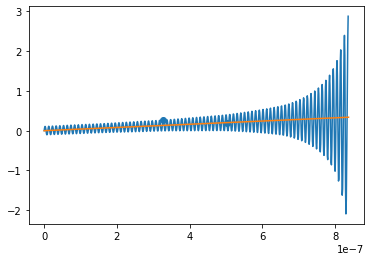

In [44]:
# Iteratively determine the interval that yields a fit within tolerance
import sys
fit_tol = 0.001
xdata = tlist[:tmax]
ydata = pauli_coeffs_t[:, 1]
while True:
    print(f'Fitting from {xdata[0]} to {xdata[-1]}')
    popt, _ = sciopt.curve_fit(line, xdata, ydata)
    print(f'Relative integral {np.sum(ydata - popt[0] * xdata) / np.sum(ydata)}')
    if abs(np.sum(ydata - popt[0] * xdata) / np.sum(ydata)) < fit_tol:
        break
                
    start = int(xdata.shape[0] * 0.1)
    end = int(xdata.shape[0] * 0.9)
    xdata = xdata[start:end]
    ydata = ydata[start:end]
    if xdata.shape[0] <= 10:
        sys.stderr.write(f'Linear fit for {ic}th pauli coefficient did not yield a reliable result.'
                         'Run the function again with the save_result_to option and check the raw output.\n')
        popt = np.array([0.])
        break
                
plt.plot(tlist[:tmax], pauli_coeffs_t[:, 1])
plt.plot(tlist[[0, tmax]], popt[0] * tlist[[0, tmax]])
plt.scatter(xdata[[0, -1]], ydata[[0, -1]])

I guess the tolerance of 0.001 is OK. Now check how well Heff approximates the evolution.

In [45]:
psi0 = (qtp.basis(2, 0) + qtp.basis(2, 1)) / np.sqrt(2.)
e_ops = [qtp.sigmax(), qtp.sigmay(), qtp.sigmaz()]
heff = (coeffs[1] * qtp.sigmax() + coeffs[2] * qtp.sigmay() + coeffs[3] * qtp.sigmaz()) / np.sqrt(2.)

tlist = make_tlist(h_int, h_drive, drive_def, 10, 100)

result_eff = qtp.sesolve([heff], psi0, tlist, e_ops=e_ops)
result_ex = run_pulse_sim(0, params_orig, drive_def, psi0, tlist=tlist, e_ops=e_ops)

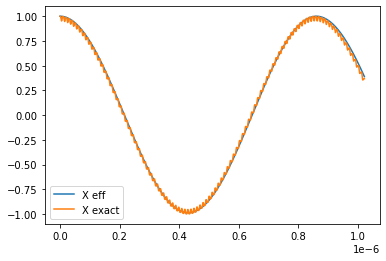

In [46]:
plt.plot(tlist, result_eff.expect[0], label='X eff')
plt.plot(tlist, result_ex.expect[0], label='X exact')
plt.legend()

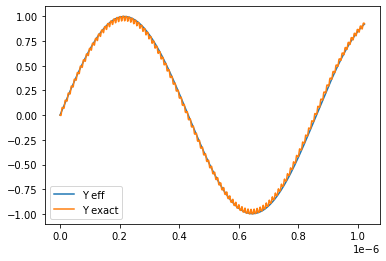

In [47]:
plt.plot(tlist, result_eff.expect[1], label='Y eff')
plt.plot(tlist, result_ex.expect[1], label='Y exact')
plt.legend()

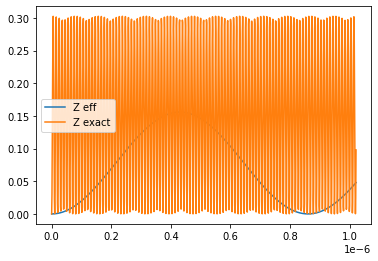

In [48]:
plt.plot(tlist, result_eff.expect[2], label='Z eff')
plt.plot(tlist, result_ex.expect[2], label='Z exact')
plt.legend()

## Check: Heff for cross resonance

In [49]:
params = dict(params_orig)
params['crosstalk'] = np.array([[1., 0.8 * np.exp(-np.pi / 4. * 1.j)], [0., 1.]], dtype=np.complex128)
drive_def = {0: {'frequency': params['wq1'], 'amplitude': 0.001}}

coeffs = find_heff((0, 1), params, drive_def, num_sim_levels=2, comp_dim=2, save_result_to='test_cr')
coeffs

array([[ 6.74832829e-05,  8.98046153e+05, -8.98043206e+05,
        -1.99899212e+05],
       [ 5.08479136e+02,  1.05432057e+03,  5.54798931e+03,
         1.00883725e+04],
       [-1.21752384e+03, -5.60550425e+03,  6.45512938e+03,
        -5.99667829e+03],
       [ 2.01314935e+05,  2.86274224e+04,  6.05377703e-01,
        -2.45680083e+01]])

In [50]:
with h5py.File('test_cr.h5', 'r') as source:
    coeffs_t = source['pauli_coeffs'][:]
    omega_t = source['omega'][:]
    tlist = source['tlist'][:]

coeffs_t.shape

(4000, 4, 4)

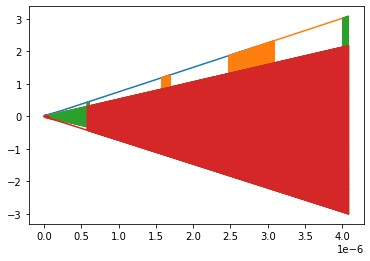

In [51]:
plt.plot(tlist, omega_t)

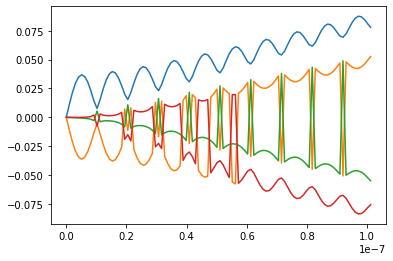

In [52]:
plt.plot(tlist[:100], omega_t[:100])

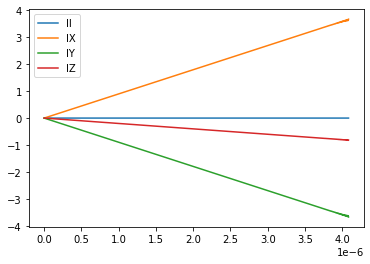

In [53]:
plt.plot(tlist, coeffs_t[:, 0, 0], label='II')
plt.plot(tlist, coeffs_t[:, 0, 1], label='IX')
plt.plot(tlist, coeffs_t[:, 0, 2], label='IY')
plt.plot(tlist, coeffs_t[:, 0, 3], label='IZ')
plt.legend()

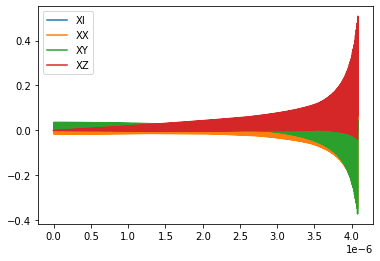

In [54]:
plt.plot(tlist, coeffs_t[:, 1, 0], label='XI')
plt.plot(tlist, coeffs_t[:, 1, 1], label='XX')
plt.plot(tlist, coeffs_t[:, 1, 2], label='XY')
plt.plot(tlist, coeffs_t[:, 1, 3], label='XZ')
plt.legend()

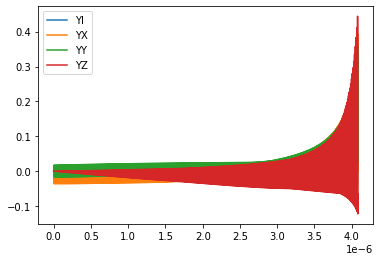

In [55]:
plt.plot(tlist, coeffs_t[:, 2, 0], label='YI')
plt.plot(tlist, coeffs_t[:, 2, 1], label='YX')
plt.plot(tlist, coeffs_t[:, 2, 2], label='YY')
plt.plot(tlist, coeffs_t[:, 2, 3], label='YZ')
plt.legend()

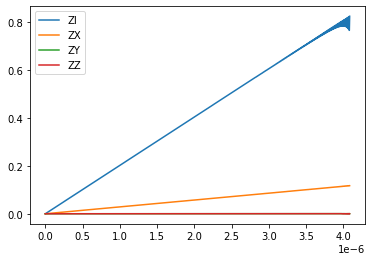

In [56]:
plt.plot(tlist, coeffs_t[:, 3, 0], label='ZI')
plt.plot(tlist, coeffs_t[:, 3, 1], label='ZX')
plt.plot(tlist, coeffs_t[:, 3, 2], label='ZY')
plt.plot(tlist, coeffs_t[:, 3, 3], label='ZZ')
plt.legend()